In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_insu = pd.read_csv("insurance.csv")
df_insu.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


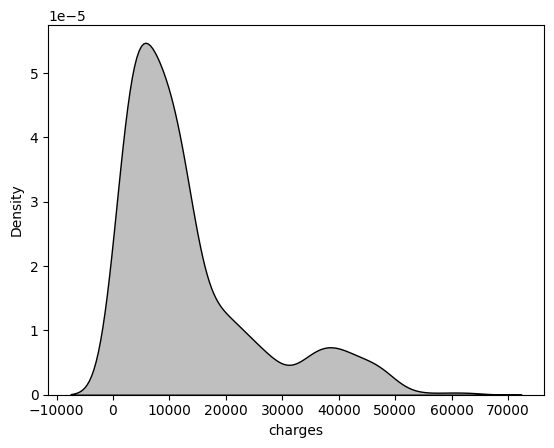

In [3]:
# Distribución la variable charges

sns.distplot(
    df_insu.charges, 
    hist = False, 
    color = "black", 
    kde_kws = {"shade": True, "linewidth": 1});

In [4]:
# Principales estadísticos de las variables numéricas

df_insu.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


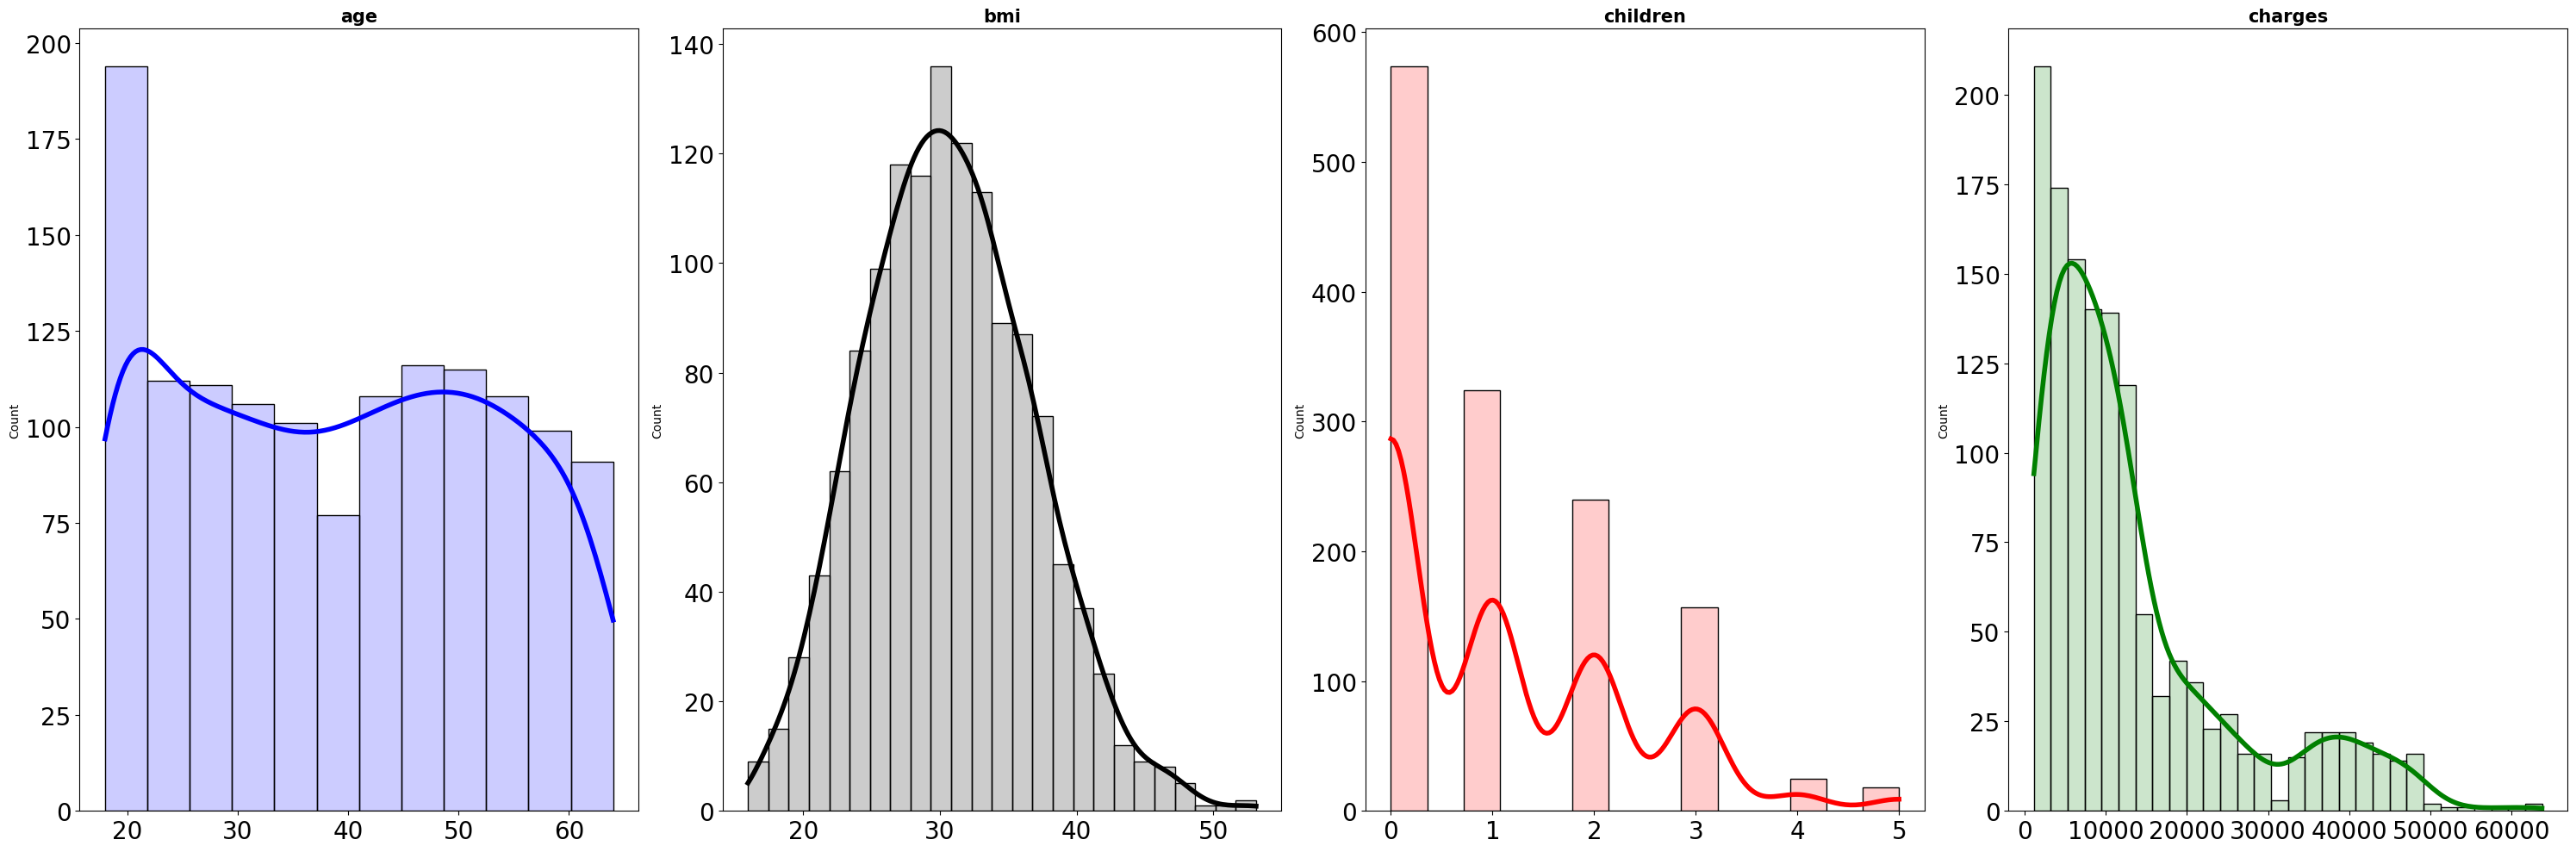

In [5]:
# Gráfico de distribución para cada variable numérica
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 10))

lista_colores = ["blue", "black", "red","green"]

axes = axes.flat

columnas_numeric = df_insu.select_dtypes(include = np.number).columns


for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df_insu,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 4}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

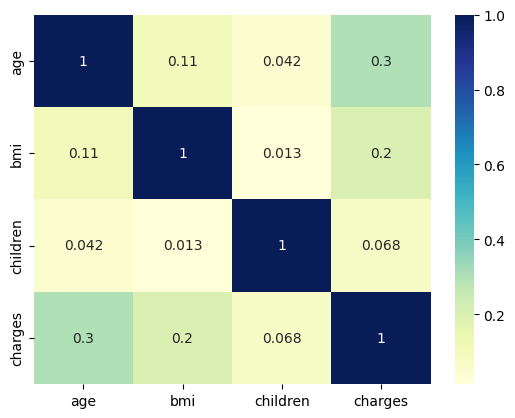

In [6]:
#Correlación entre variables numéricas
sns.heatmap(df_insu.corr(), 
           cmap = "YlGnBu", 
           annot = True);

In [7]:
mask = np.triu(np.ones_like(df_insu.corr(), dtype = np.bool))
mask

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

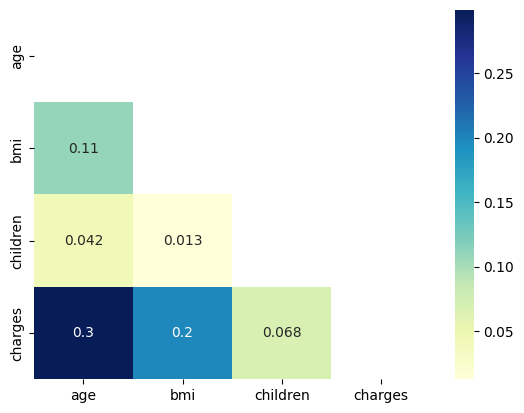

In [8]:
sns.heatmap(df_insu.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True);

In [9]:
# outliers
df_numeros = df_insu.select_dtypes(include=np.number)

df_numeros.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


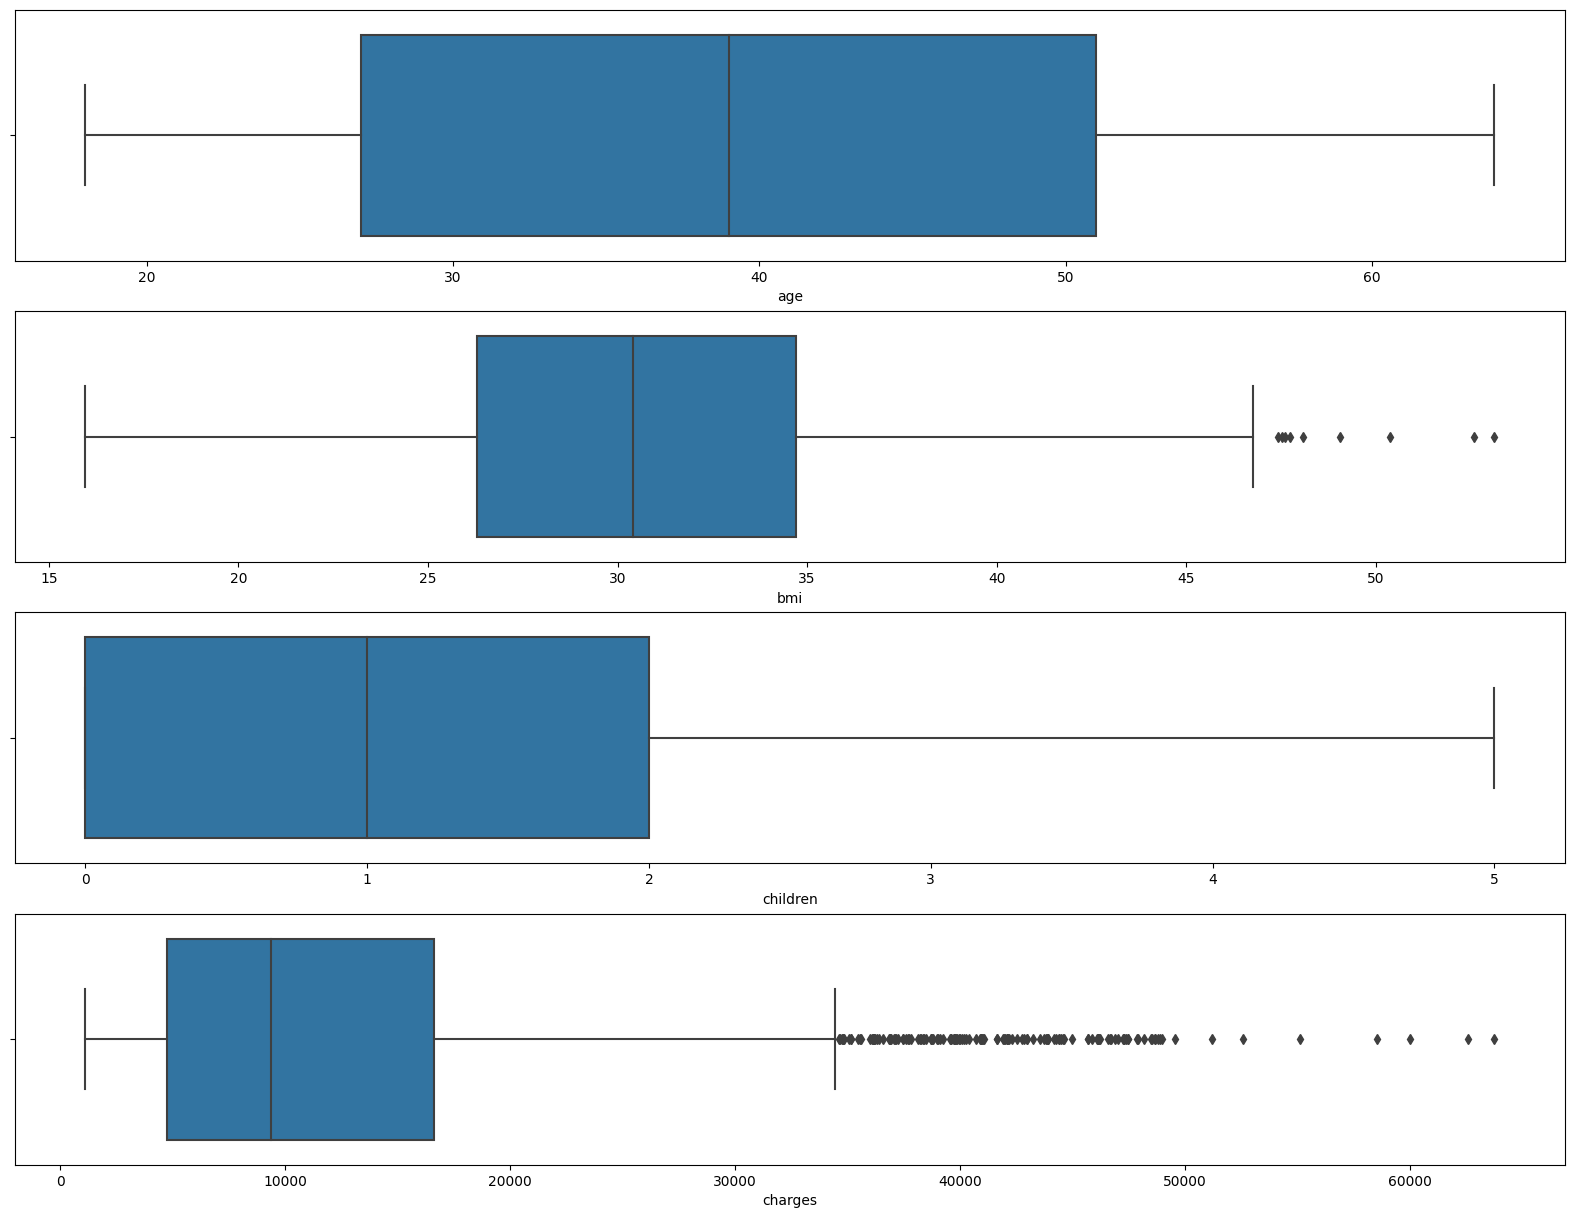

In [10]:
fig, ax = plt.subplots(4, 1, figsize=(20,15))

for i in range(len(df_numeros.columns)):
    
    sns.boxplot(x=df_numeros.columns[i], 
                data=df_numeros, 
                ax=ax[i])
plt.show()


In [11]:
df_numeros = df_numeros.select_dtypes(include=np.number)

df_numeros.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [12]:
def outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df_insu[col], 25)
        Q3 = np.nanpercentile(df_insu[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index))
        

    
    return dicc_indices 

In [13]:
lista_columnas = df_numeros.columns
lista_columnas

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [14]:
ind = outliers(lista_columnas, df_numeros)

In [15]:
for k, v in ind.items():
    if k == "bmi":
        media = df_numeros[k].mean()
        for i in v:
            df_numeros.loc[i,k] = media 
    else: 
        mediana = df_numeros[k].median() 
        for i in v: 
            df_numeros.loc[i,k] = mediana 

In [16]:
df1 = df_numeros.select_dtypes(include = np.number)
df1= df_numeros.drop("charges", axis=1)

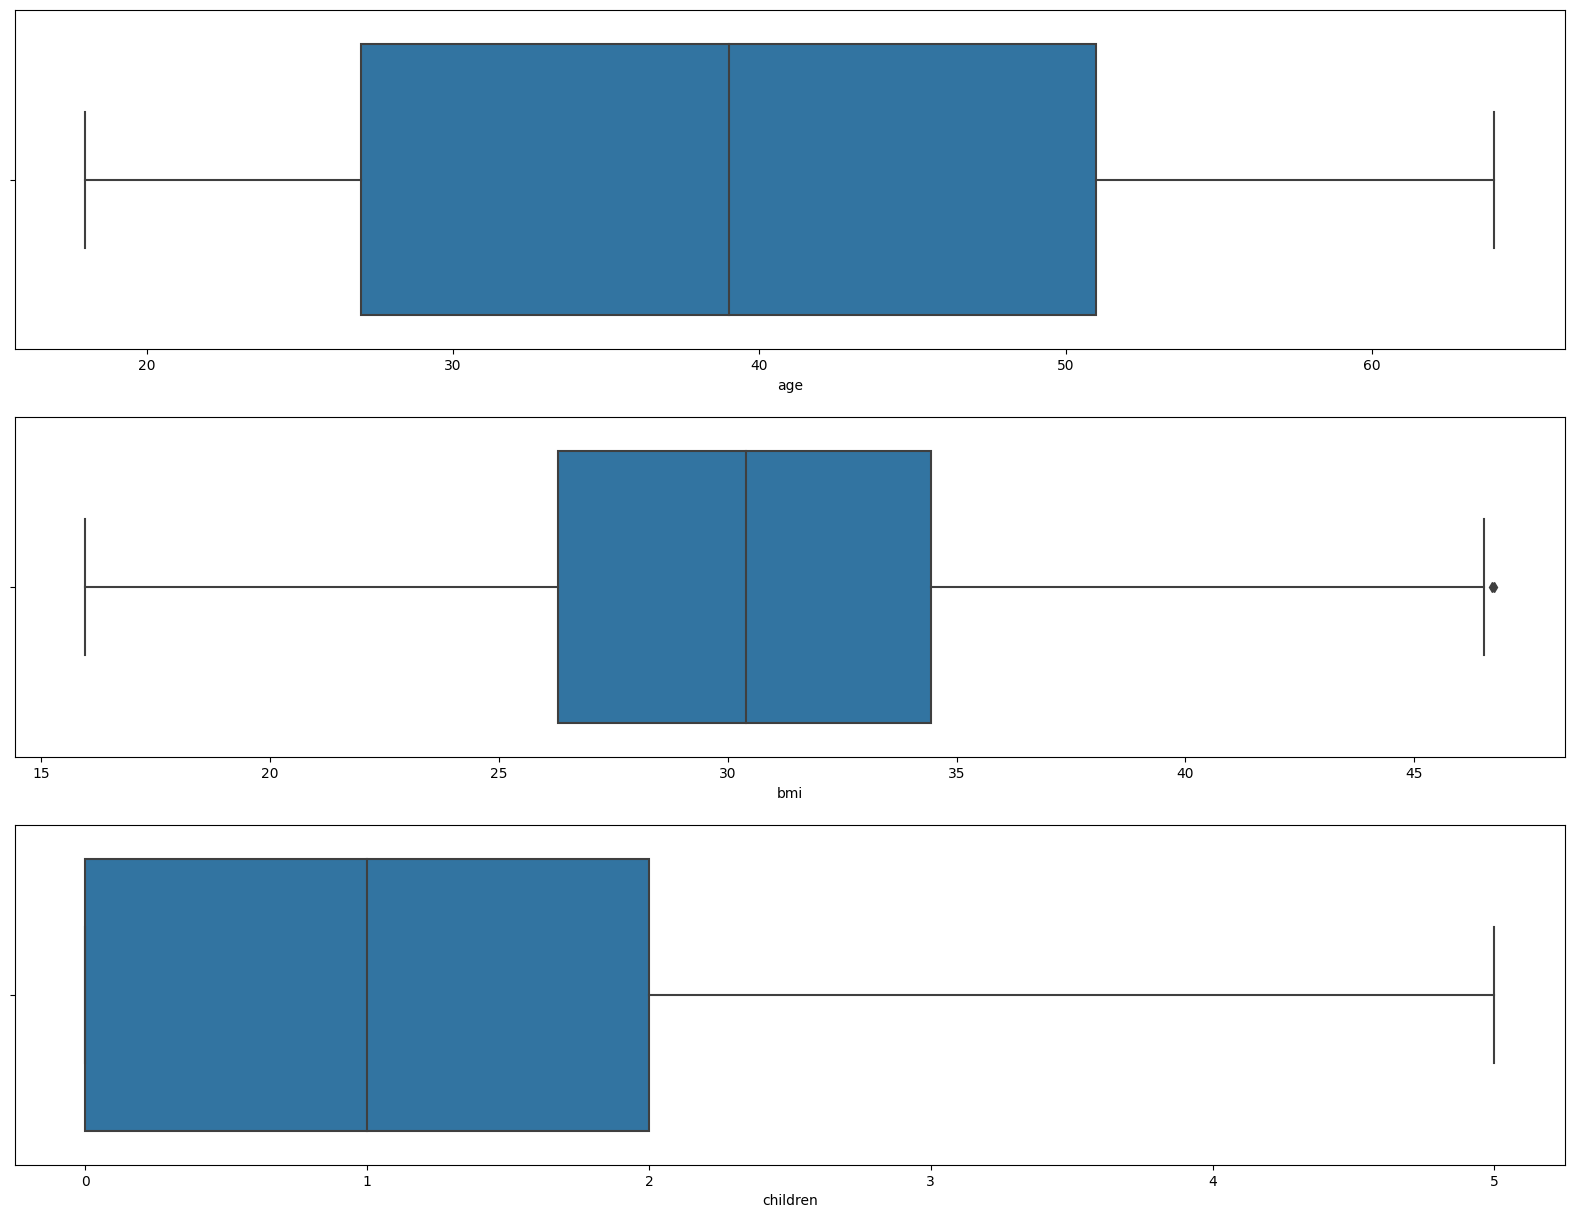

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))

for i in range(len(df1.columns)):
    
    sns.boxplot(x=df1.columns[i], 
                data=df1, 
                ax=ax[i])
plt.show()

In [18]:
scaler = StandardScaler()

In [19]:
df_numeros.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


In [22]:
scaler.fit(df_insu[columnas_numeric])

StandardScaler()

In [28]:
scaler2 = scaler.transform(df_insu[columnas_numeric])
scaler2

array([[-1.43876426, -0.45332   , -0.90861367,  0.2985838 ],
       [-1.50996545,  0.5096211 , -0.07876719, -0.95368917],
       [-0.79795355,  0.38330685,  1.58092576, -0.72867467],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, -0.96159623],
       [-1.29636188, -0.79781341, -0.90861367, -0.93036151],
       [ 1.55168573, -0.26138796, -0.90861367,  1.31105347]])

In [29]:
df_insu.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
df_insu2 = df_insu.copy()

In [31]:
df_insu2[columnas_numeric] = scaler2
df_insu2.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,-0.908614,yes,southwest,0.298584
1,-1.509965,male,0.509621,-0.078767,no,southeast,-0.953689
2,-0.797954,male,0.383307,1.580926,no,southeast,-0.728675
3,-0.441948,male,-1.305531,-0.908614,no,northwest,0.719843
4,-0.513149,male,-0.292556,-0.908614,no,northwest,-0.776802


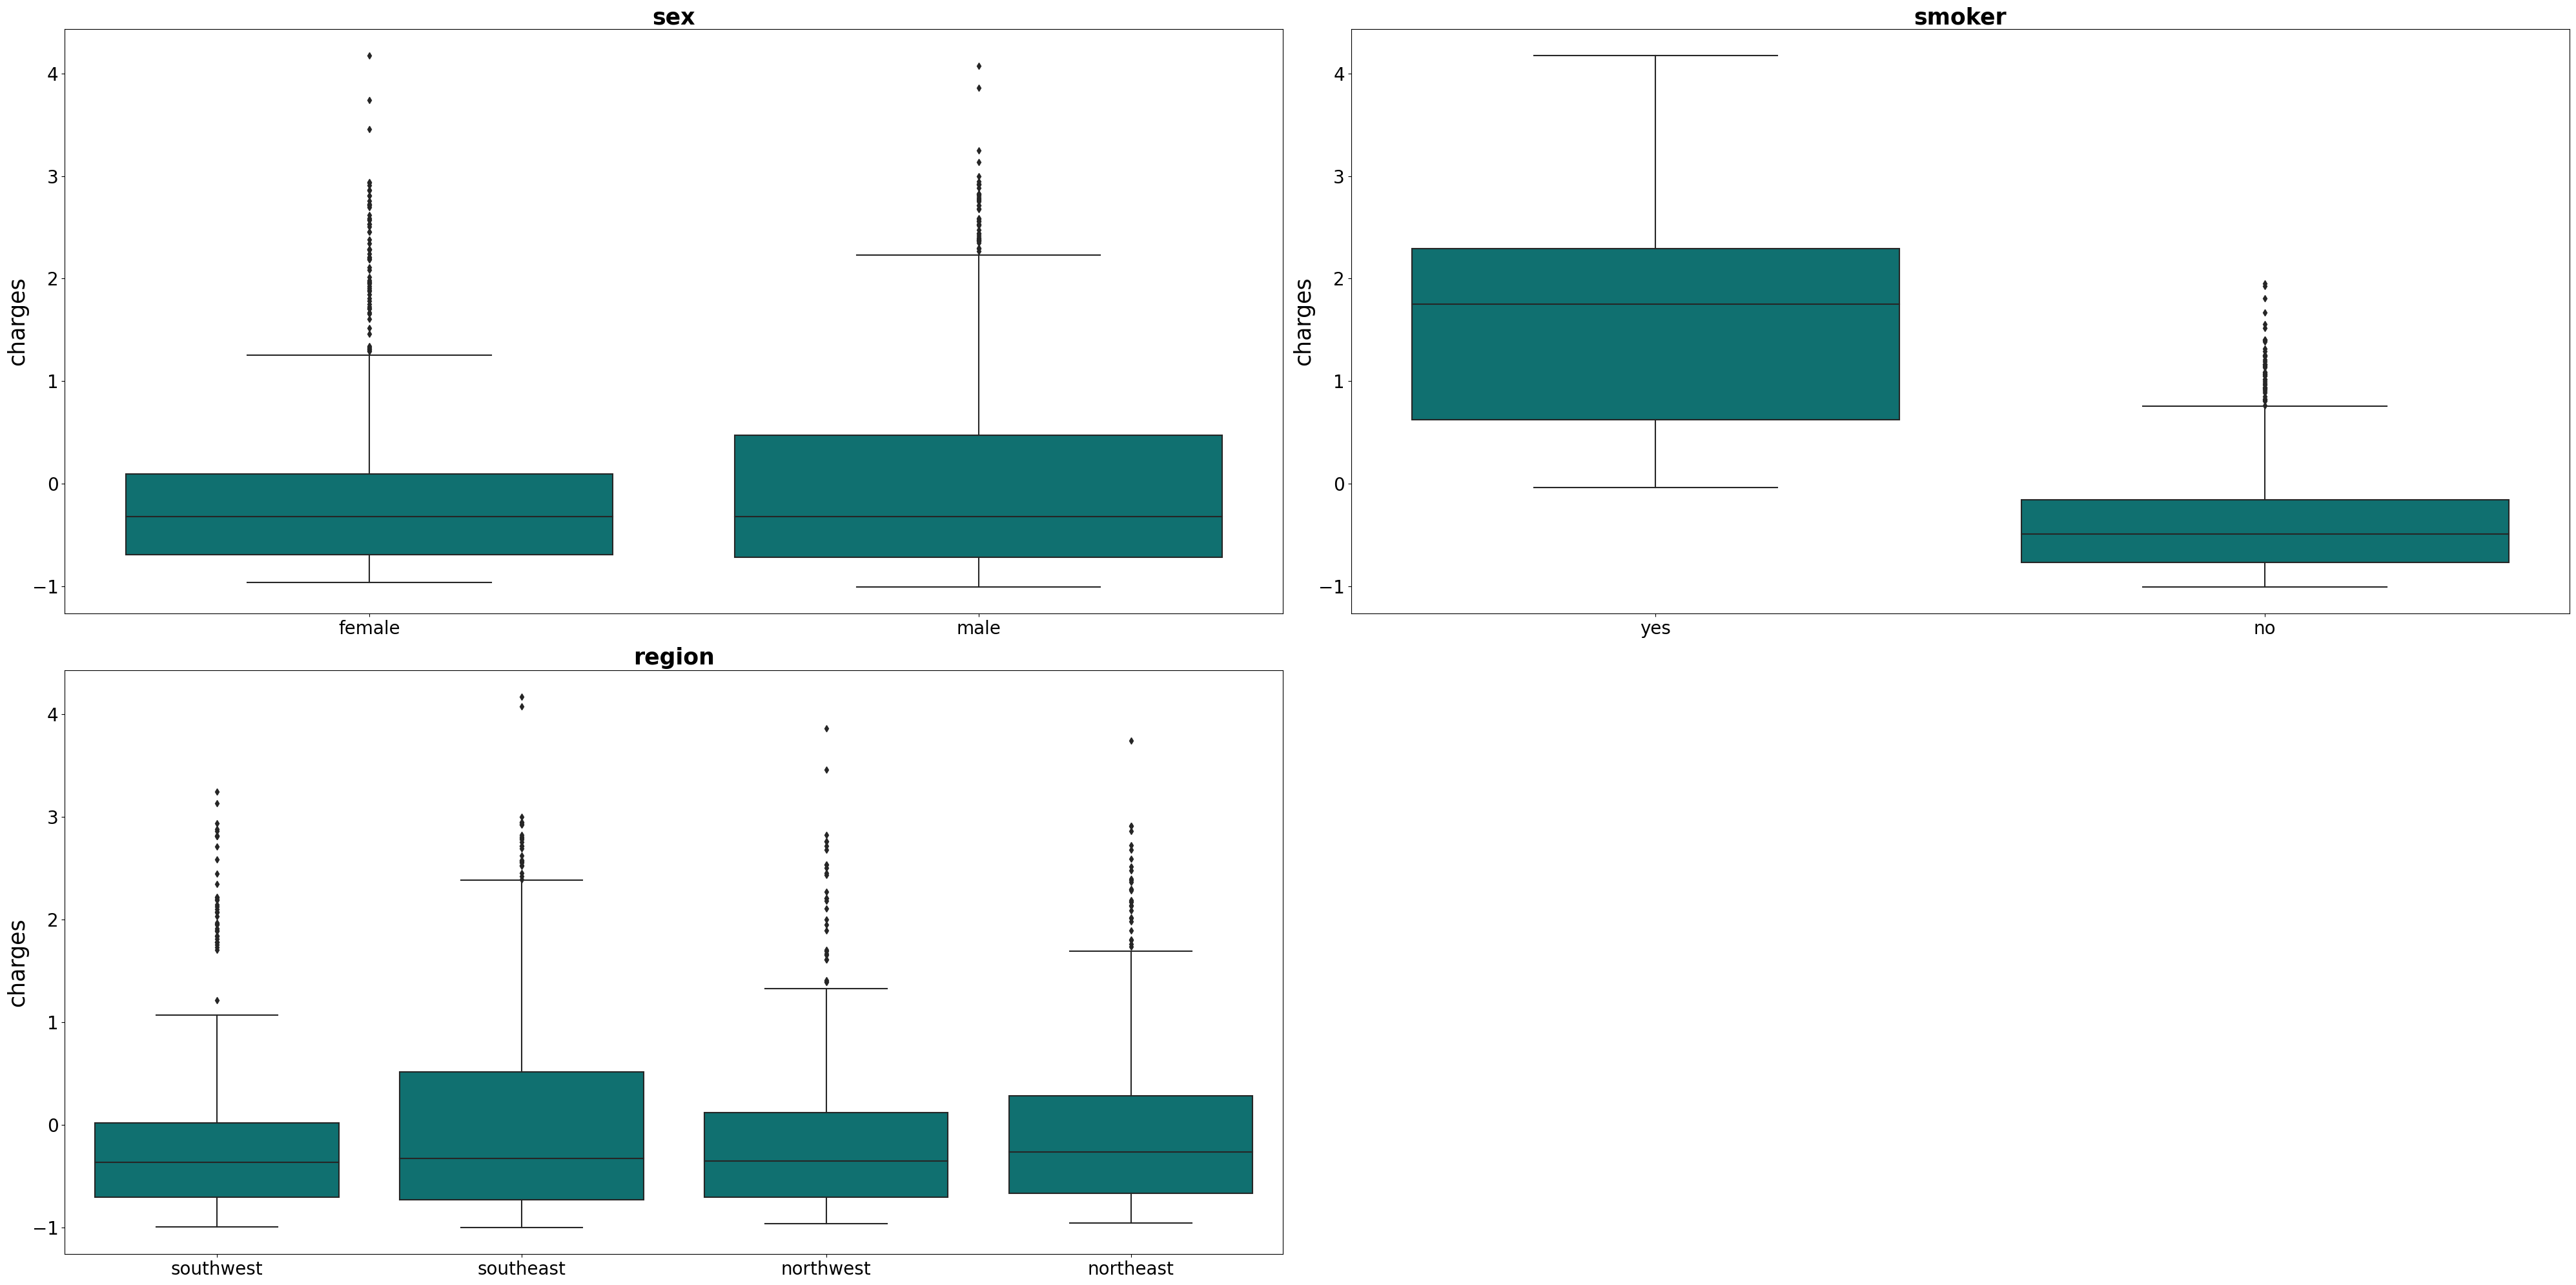

In [32]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df_insu.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df_insu2,
        x = colum,
        y = "charges",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();
